# Predicting Wine Quality with k-Nearest Neighbours

In [1]:
! pip install fast_ml --quiet

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression as mr
from sklearn.linear_model import LinearRegression
from fast_ml.model_development import train_valid_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("sparklingwine.csv")
df

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,5.4,0.29,0.38,1.2,0.029,31.0,132.0,0.98895,3.28,0.36,12.40,6
1,1,6.7,0.24,0.29,14.9,0.053,55.0,136.0,0.99839,3.03,0.52,9.00,5
2,2,6.8,0.33,0.31,7.4,0.045,34.0,143.0,0.99226,3.06,0.55,12.20,6
3,3,6.4,0.27,0.19,2.0,0.084,21.0,191.0,0.99516,3.49,0.63,9.60,4
4,4,6.1,0.30,0.30,2.1,0.031,50.0,163.0,0.98950,3.39,0.43,12.70,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,1595,7.1,0.33,0.64,13.2,0.056,12.0,105.0,0.99720,3.05,0.39,9.20,5
1596,1596,7.8,0.21,0.39,1.8,0.034,62.0,180.0,0.99100,3.09,0.75,12.60,8
1597,1597,6.4,0.42,0.19,9.3,0.043,28.0,145.0,0.99433,3.23,0.53,10.98,5
1598,1598,8.4,0.35,0.71,12.2,0.046,22.0,160.0,0.99820,2.98,0.65,9.40,5


I start by constructing a new binary column “good wine” that indicates whether the wine is good (having a quality of 6 or higher) or not.

In [4]:
df['good wine'] = np.where(df['quality']>=6, 1, 0)
df.drop(['Unnamed: 0', 'quality'], axis=1, inplace=True)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,good wine
0,5.4,0.29,0.38,1.2,0.029,31.0,132.0,0.98895,3.28,0.36,12.40,1
1,6.7,0.24,0.29,14.9,0.053,55.0,136.0,0.99839,3.03,0.52,9.00,0
2,6.8,0.33,0.31,7.4,0.045,34.0,143.0,0.99226,3.06,0.55,12.20,1
3,6.4,0.27,0.19,2.0,0.084,21.0,191.0,0.99516,3.49,0.63,9.60,0
4,6.1,0.30,0.30,2.1,0.031,50.0,163.0,0.98950,3.39,0.43,12.70,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1595,7.1,0.33,0.64,13.2,0.056,12.0,105.0,0.99720,3.05,0.39,9.20,0
1596,7.8,0.21,0.39,1.8,0.034,62.0,180.0,0.99100,3.09,0.75,12.60,1
1597,6.4,0.42,0.19,9.3,0.043,28.0,145.0,0.99433,3.23,0.53,10.98,0
1598,8.4,0.35,0.71,12.2,0.046,22.0,160.0,0.99820,2.98,0.65,9.40,0


In [5]:
X = df.iloc[:, :11]
y = df[['good wine']]

Then, I split the data set into a training data set (first 900 samples), a validation data set (next 300 samples), and a test data set (last 400 samples).

In [6]:
# train, validation, test split
X_train = X.iloc[:900, :]
y_train = y.iloc[:900, :]
X_valid = X.iloc[900:1200, :]
y_valid = y.iloc[900:1200, :]
X_test = X.iloc[1200:, :]
y_test = y.iloc[1200:, :]

In [7]:
# normalize the data
n_X_train=(X_train-X_train.mean())/X_train.std()

n_X_valid=(X_valid-X_train.mean())/X_train.std()

n_X_test=(X_test-X_train.mean())/X_train.std()

Finally, I load and train the k-Nearest Neighbours classifiers for k = 1,2,...,100. Then, I evaluate each classifier using the validation data set and select the best classifier. I also predict the generalisation error using the test data set.

In [8]:
# Dictionary to store models and their validation accuracies
knn_models = {}
validation_accuracies = {}

# Train k-NN classifiers for k = 1 to 100
for k in range(1, 101):
    # Create k-NN classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(n_X_train, y_train)

    # Store the classifier in the dictionary
    knn_models[k] = knn

    # Evaluate on validation data
    y_pred = knn.predict(n_X_valid)
    accuracy = accuracy_score(y_valid, y_pred)
    validation_accuracies[k] = accuracy
    print(f"k = {k}: Validation Accuracy = {accuracy}")

# After this, knn_models dictionary will contain all your trained models
# and validation_accuracies will have their corresponding validation accuracies

# find the value of k with the highest validation accuracy
max_acc = max(validation_accuracies.values())
max_k = []
for key in validation_accuracies:
    if validation_accuracies[key] == max_acc:
        max_k.append(key)
print(f"Best k by validation accuracy: {max_k} with accuracy = {max_acc} and cliassification error = {1 - max_acc}")

k = 1: Validation Accuracy = 0.7566666666666667
k = 2: Validation Accuracy = 0.7066666666666667
k = 3: Validation Accuracy = 0.73
k = 4: Validation Accuracy = 0.7033333333333334
k = 5: Validation Accuracy = 0.74
k = 6: Validation Accuracy = 0.72
k = 7: Validation Accuracy = 0.7433333333333333
k = 8: Validation Accuracy = 0.74
k = 9: Validation Accuracy = 0.7566666666666667
k = 10: Validation Accuracy = 0.7333333333333333
k = 11: Validation Accuracy = 0.7533333333333333
k = 12: Validation Accuracy = 0.7366666666666667
k = 13: Validation Accuracy = 0.7433333333333333
k = 14: Validation Accuracy = 0.74
k = 15: Validation Accuracy = 0.7466666666666667
k = 16: Validation Accuracy = 0.7433333333333333
k = 17: Validation Accuracy = 0.7566666666666667
k = 18: Validation Accuracy = 0.7433333333333333
k = 19: Validation Accuracy = 0.7433333333333333
k = 20: Validation Accuracy = 0.7466666666666667
k = 21: Validation Accuracy = 0.74
k = 22: Validation Accuracy = 0.7366666666666667
k = 23: Validat

In [9]:
# Dictionary to store test accuracies
test_accuracies = {}

# Evaluate each model on the test data
for k, model in knn_models.items():
    # Predict on test data
    y_test_pred = model.predict(n_X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_accuracies[k] = test_accuracy
    #print(f"k = {k}: Test Accuracy = {test_accuracy}")

# Calculate generalization error for each model
generalization_errors = {k: 1 - acc for k, acc in test_accuracies.items()}

# Display generalization errors
for k, error in generalization_errors.items():
    print(f"k = {k}: Generalization Error = {error}")

# Find the model k = [1, 9, 17] with the lowest generalization error
print("Generalisation Error for k = 1 is ", generalization_errors[1])
print("Generalisation Error for k = 9 is ", generalization_errors[9])
print("Generalisation Error for k = 17 is ", generalization_errors[17])

k = 1: Generalization Error = 0.31000000000000005
k = 2: Generalization Error = 0.29500000000000004
k = 3: Generalization Error = 0.255
k = 4: Generalization Error = 0.26749999999999996
k = 5: Generalization Error = 0.235
k = 6: Generalization Error = 0.26249999999999996
k = 7: Generalization Error = 0.25249999999999995
k = 8: Generalization Error = 0.24750000000000005
k = 9: Generalization Error = 0.255
k = 10: Generalization Error = 0.24750000000000005
k = 11: Generalization Error = 0.235
k = 12: Generalization Error = 0.23750000000000004
k = 13: Generalization Error = 0.21999999999999997
k = 14: Generalization Error = 0.22250000000000003
k = 15: Generalization Error = 0.22999999999999998
k = 16: Generalization Error = 0.22750000000000004
k = 17: Generalization Error = 0.235
k = 18: Generalization Error = 0.24250000000000005
k = 19: Generalization Error = 0.24750000000000005
k = 20: Generalization Error = 0.24
k = 21: Generalization Error = 0.24250000000000005
k = 22: Generalization 

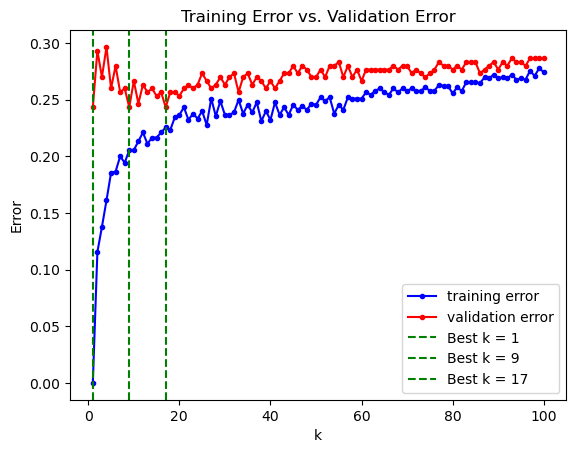

k = 1, gap: 0.2433333333333333
k = 9, gap: 0.03777777777777769
k = 17, gap: 0.01777777777777778


In [10]:
# training error vs validation error
train_errors = {}

# Evaluate each model on the test data
for k, model in knn_models.items():
    # Predict on test data
    y_train_pred = model.predict(n_X_train)
    train_error = 1 - accuracy_score(y_train, y_train_pred)
    train_errors[k] = train_error

validation_errors= {}
for k in range(1,101):
    validation_errors[k] = 1 - validation_accuracies[k]

# Plot the training errors
plt.plot(train_errors.keys(), train_errors.values(), marker='.', linestyle='-', color='b', label="training error")
plt.plot(validation_errors.keys(), validation_errors.values(), marker='.', linestyle='-', color='r', label="validation error")
plt.title('Training Error vs. Validation Error')
plt.xlabel('k')
plt.ylabel('Error')

# Plot vertical lines for all best k values
for k in [1, 9, 17]:
    plt.axvline(x=k, color='green', linestyle='--', label=f'Best k = {k}')

plt.legend()
plt.show()

print("k = 1, gap:", validation_errors[1] - train_errors[1])
print("k = 9, gap:", validation_errors[9] - train_errors[9])
print("k = 17, gap:", validation_errors[17] - train_errors[17])

Among the models with the smallest validation error, model k = 17 is the best classifier given the lowest generalisation error.

The results for the generalization error with k = 9 and k = 17 are very similar and really close to the classification error observed on the validation data. Thus, this suggests that the model is not overfitting. we don't choose k=1 because we don't want our model to be sensitive to noise and outliers in the data. Furthermore, the plot indicates that for k=9 and k=17, the training error and validation error are moderately different and the model is performing very well on both set of data, which is a sign that our model is not underfitting or overfitting.

---

I will now try a new splitting: training data set (first 400 samples), validation data set (next 400 samples), test data set (last 800 samples)

In [11]:
# train, validation, test split
X_train2 = X.iloc[:400, :]
y_train2 = y.iloc[:400, :]
X_valid2 = X.iloc[400:800, :]
y_valid2 = y.iloc[400:800, :]
X_test2 = X.iloc[800:, :]
y_test2 = y.iloc[800:, :]

# normalize the data
n_X_train2=(X_train2-X_train2.mean())/X_train2.std()

n_X_valid2=(X_valid2-X_train2.mean())/X_train2.std()

n_X_test2=(X_test2-X_train2.mean())/X_train2.std()

In [12]:
# Dictionary to store models and their validation accuracies
knn_models2 = {}
validation_accuracies2 = {}

# Train k-NN classifiers for k = 1 to 100
for k in range(1, 101):
    # Create k-NN classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(n_X_train2, y_train2)

    # Store the classifier in the dictionary
    knn_models2[k] = knn

    # Evaluate on validation data
    y_pred2 = knn.predict(n_X_valid2)
    accuracy = accuracy_score(y_valid2, y_pred2)
    validation_accuracies2[k] = accuracy
    print(f"k = {k}: Validation Accuracy = {accuracy}")

# After this, knn_models dictionary will contain all your trained models
# and validation_accuracies will have their corresponding validation accuracies

# Optional: You can find the value of k with the highest validation accuracy
max_acc = max(validation_accuracies2.values())
max_k = []
for key in validation_accuracies2:
    if validation_accuracies2[key] == max_acc:
        max_k.append(key)
print(f"Best k by validation accuracy: {max_k} with accuracy = {max_acc} and classification error = {1 - max_acc}")

k = 1: Validation Accuracy = 0.72
k = 2: Validation Accuracy = 0.6875
k = 3: Validation Accuracy = 0.7225
k = 4: Validation Accuracy = 0.73
k = 5: Validation Accuracy = 0.7375
k = 6: Validation Accuracy = 0.7375
k = 7: Validation Accuracy = 0.7275
k = 8: Validation Accuracy = 0.7325
k = 9: Validation Accuracy = 0.72
k = 10: Validation Accuracy = 0.7125
k = 11: Validation Accuracy = 0.72
k = 12: Validation Accuracy = 0.725
k = 13: Validation Accuracy = 0.725
k = 14: Validation Accuracy = 0.7225
k = 15: Validation Accuracy = 0.725
k = 16: Validation Accuracy = 0.7375
k = 17: Validation Accuracy = 0.7225
k = 18: Validation Accuracy = 0.7275
k = 19: Validation Accuracy = 0.7175
k = 20: Validation Accuracy = 0.7325
k = 21: Validation Accuracy = 0.72
k = 22: Validation Accuracy = 0.735
k = 23: Validation Accuracy = 0.72
k = 24: Validation Accuracy = 0.7275
k = 25: Validation Accuracy = 0.7075
k = 26: Validation Accuracy = 0.7125
k = 27: Validation Accuracy = 0.7
k = 28: Validation Accuracy =

In [13]:
# Dictionary to store test accuracies
test_accuracies2 = {}

# Evaluate each model on the test data
for k, model in knn_models.items():
    # Predict on test data
    y_test_pred2 = model.predict(n_X_test2)
    test_accuracy = accuracy_score(y_test2, y_test_pred2)
    test_accuracies2[k] = test_accuracy
    #print(f"k = {k}: Test Accuracy = {test_accuracy}")

# Calculate generalization error for each model
generalization_errors2 = {k: 1 - acc for k, acc in test_accuracies2.items()}

# Display generalization errors
for k, error in generalization_errors2.items():
    print(f"k = {k}: Generalization Error = {error}")

print("Generalisation Error for k = 5 is ", generalization_errors2[5])
print("Generalisation Error for k = 6 is ", generalization_errors2[6])
print("Generalisation Error for k = 16 is ", generalization_errors2[16])

k = 1: Generalization Error = 0.25
k = 2: Generalization Error = 0.28874999999999995
k = 3: Generalization Error = 0.26
k = 4: Generalization Error = 0.27875000000000005
k = 5: Generalization Error = 0.24875000000000003
k = 6: Generalization Error = 0.26375000000000004
k = 7: Generalization Error = 0.25
k = 8: Generalization Error = 0.25749999999999995
k = 9: Generalization Error = 0.25
k = 10: Generalization Error = 0.24875000000000003
k = 11: Generalization Error = 0.24250000000000005
k = 12: Generalization Error = 0.23124999999999996
k = 13: Generalization Error = 0.22875
k = 14: Generalization Error = 0.22250000000000003
k = 15: Generalization Error = 0.22750000000000004
k = 16: Generalization Error = 0.22250000000000003
k = 17: Generalization Error = 0.22750000000000004
k = 18: Generalization Error = 0.24
k = 19: Generalization Error = 0.23750000000000004
k = 20: Generalization Error = 0.24
k = 21: Generalization Error = 0.23250000000000004
k = 22: Generalization Error = 0.23375
k

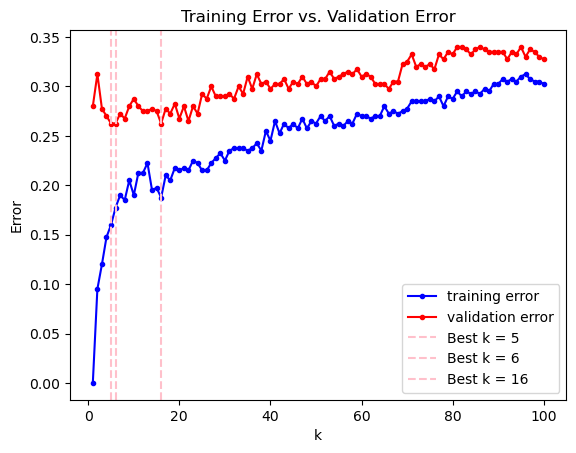

k = 5, gap: 0.10249999999999992
k = 6, gap: 0.08499999999999996
k = 16, gap: 0.07499999999999996


In [14]:
# training error vs validation error
train_errors2 = {}

# Evaluate each model on the test data
for k, model in knn_models2.items():
    # Predict on test data
    y_train_pred2 = model.predict(n_X_train2)
    train_error2 = 1 - accuracy_score(y_train2, y_train_pred2)
    train_errors2[k] = train_error2

validation_errors2= {}
for k in range(1,101):
    validation_errors2[k] = 1 - validation_accuracies2[k]

# Plot the training errors
plt.plot(train_errors2.keys(), train_errors2.values(), marker='.', linestyle='-', color='b', label="training error")
plt.plot(validation_errors2.keys(), validation_errors2.values(), marker='.', linestyle='-', color='r', label="validation error")
plt.title('Training Error vs. Validation Error')
plt.xlabel('k')
plt.ylabel('Error')

# Plot vertical lines for all best k values
for k in [5, 6, 16]:
    plt.axvline(x=k, color='pink', linestyle='--', label=f'Best k = {k}')

plt.legend()
plt.show()

print("k = 5, gap:", validation_errors2[5] - train_errors2[5])
print("k = 6, gap:", validation_errors2[6] - train_errors2[6])
print("k = 16, gap:", validation_errors2[16] - train_errors2[16])

Among the models with the smallest validation error, model k = 16 is the best classifier given the lowest generalisation error.

The results for the generalization error with k = 5, 6, 16 are very similar and really close to the classification error observed on the validation data. Thus, this suggests that the model is not overfitting. The plot indicates that for k =16, the training error and validation error are moderately different, signifying that our model is not underfitting or overfitting.

## Conclusion

In the first split (training 900, validation 300, test 400), the best models have optimal k = 17 with classification error = 0.2433333333333333. Their generalization error = 0.235.

In the second split (training 400, validation 400, test 800), the best models have optimal k=16 with classification error = 0.26249999999999996 and generalisation error = 0.22250000000000003.

While the difference is not large, the second split gives a better model.

A reason that could explain why the second split performs better is that, even though the first split contains more training data, the second split could encompasses a more diverse dataset in both the training and test sets. This is in contrast to the initial split, which may have included certain patterns or types of data, making the training and test sets underrepresented. The presence of a more diverse dataset in the second split could contribute to a better understanding of the model's performance across different scenarios and patterns.

It's important to note that sometimes, the differences in performance between splits could be attributed to the random variability of data splits, especially considering that the gap in generalization error values is very small.